In [68]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns




In [69]:
train = pd.read_csv('sign_mnist_train/sign_mnist_train.csv')
test = pd.read_csv('sign_mnist_test/sign_mnist_test.csv')

In [70]:
train.head()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [71]:
#get our training labels 
labels = train['label'].values

In [72]:
# View the unique labels. 24 in total (no 9)
unique_val = np.array(labels)
np.unique(unique_val)


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

<AxesSubplot:ylabel='count'>

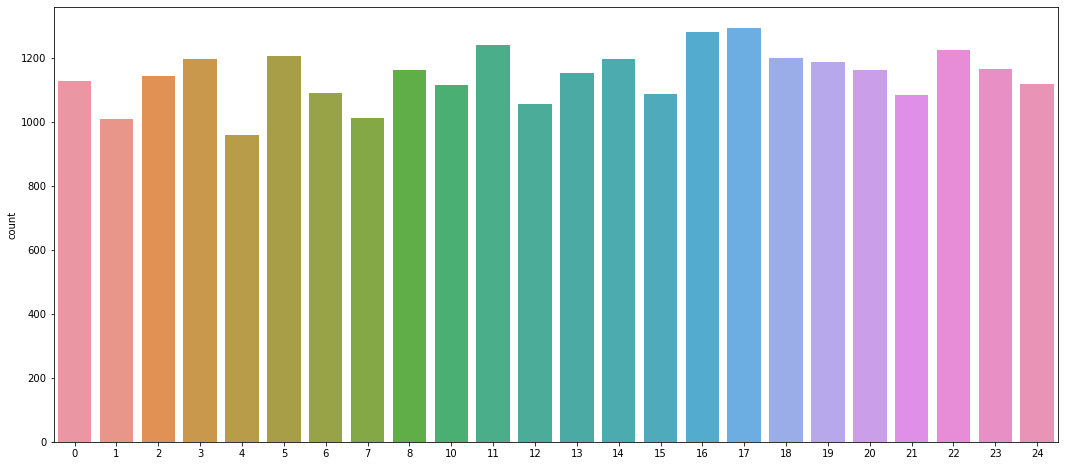

In [73]:
#plot the quantities in each class
plt.figure(figsize = (18,8))
sns.countplot(x =labels)

In [74]:
#Drop Training Labels from our training data so we can seperate it 
train.drop('label',axis = 1, inplace = True)

In [75]:
#extract the image data from each row in our csv, remember it's in a row of 784 columns

images = train.values
images = np.array([np.reshape(i,(28,28)) for i in images])
images = np.array([i.flatten() for i in images])

In [76]:
# hot one encode our labels 

from sklearn.preprocessing import LabelBinarizer

label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)

In [77]:
#View our labels
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


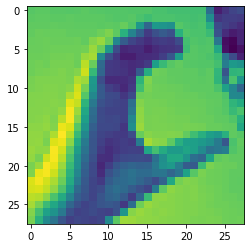

In [78]:
# Inspecing an image 

index = 2

print(labels[index])

plt.imshow(images[index].reshape(28,28))

In [79]:
# Using open cv to view 10 random images
import cv2
import numpy as np



for i in range(0, 10):
    rand = np.random.randint(0, len(images))
    input_im = images[rand]

    sample = input_im.reshape(28, 28).astype(np.uint8)
    sample = cv2.resize(sample, None, fx=10, fy=10, interpolation=cv2.INTER_CUBIC)
    cv2.imshow("sample image", sample)
    cv2.waitKey(0)

cv2.destroyAllWindows()


error: OpenCV(4.8.1) /io/opencv/modules/highgui/src/window.cpp:1272: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


In [80]:
#split our data into x_train, x_test, y_train and y_test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 101)

In [81]:
#start loding our tensorflow modules and define out batch size ets 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

batch_size = 128
num_classes = 24
epochs = 2


In [82]:
#scale pur images 
x_train = x_train / 255
X_test = x_test / 255

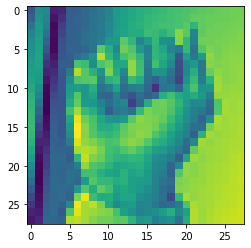

In [83]:
#reshape them into the size required by TF and Keras 
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)


plt.imshow(x_train[0].reshape(28,28))

In [84]:
# Create our CNN Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam 

model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))

model.add(Dense(num_classes, activation = 'softmax'))

In [85]:
# Compile our Model 
model.compile(loss = 'categorical_crossentropy',
              optimizer= Adam(),
              metrics=['accuracy'])

In [86]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 1, 1, 64)         

In [87]:
#Train our Model 
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/2
151/151 [==============================] - 5s 27ms/step - loss: 2.6401 - accuracy: 0.1946 - val_loss: 116.1461 - val_accuracy: 0.3772
Epoch 2/2
151/151 [==============================] - 4s 26ms/step - loss: 1.1969 - accuracy: 0.6003 - val_loss: 80.2176 - val_accuracy: 0.6885


In [88]:
# Save our model

model.save("sign_mist_cnn_50_Epochs.h5")
print("Model Saved")

Model Saved


/home/ujjwal/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


/tmp/ipykernel_26246/715386904.py:9: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


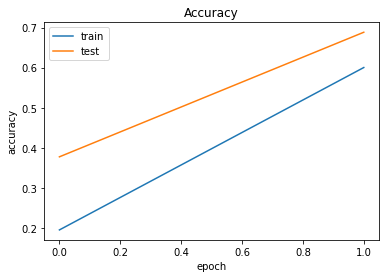

In [89]:
    #View our training history graphically
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title("Accuracy")
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['train','test'])

    plt.show()

In [90]:
!pip install --upgrade pip
!pip install mediapipe-model-maker

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [96]:
import cv2
import numpy as np
import mediapipe as mp
import tensorflow as tf
from tensorflow.keras.models import load_model

In [97]:
# initialize mediapipe
mpHands = mp.solutions.hands
hands = mpHands.Hands(max_num_hands=1, min_detection_confidence=0.7)
mpDraw = mp.solutions.drawing_utils

In [99]:
# Load the gesture recognizer model
model = load_model('mp_hand_gesture')

# Load class names
f = open('gesture.names', 'r')
classNames = f.read().split('\n')
f.close()
print(classNames)

['okay', 'peace', 'thumbs up', 'thumbs down', 'call me', 'stop', 'rock', 'live long', 'fist', 'smile']


In [ ]:
# Initialize the webcam for Hand Gesture Recognition Python project
cap = cv2.VideoCapture(0)

while True:
  # Read each frame from the webcam
  _, frame = cap.read()
x , y, c = frame.shape

  # Flip the frame vertically
frame = cv2.flip(frame, 1)
  # Show the final output
cv2.imshow("Output", frame)
if cv2.waitKey(1) == ord('q'):
    		break

# release the webcam and destroy all active windows
cap.release()
cv2.destroyAllWindows()